In [7]:
comparisons = pd.read_csv('/content/comparisons_20250327_200418.csv')
comparisons.head(10)

,created_at,fixed_image_id,variable_image_id,user_id,selected_original,comparison_id,fixed_image_filename,variable_image_filename
0,2025-03-25 20:10:06.942000+00:00,RnRZorskoVeYOGR1KgDl,usJAK6P88ANorx1RsdnT,429179283,True,00ntyrQWfGb81eyHfWAW,afro.jpg,purple_hair.jpg
1,2025-03-26 13:30:24.725000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,232779016,True,01oalxAsm3jKC9HE13vk,afro.jpg,curly_hair.jpg
2,2025-03-25 21:00:20.856000+00:00,RnRZorskoVeYOGR1KgDl,sNKO1mWjblTkuXnHSXQZ,1848199392,False,06KwiM3oNFjD6bo6w1xq,afro.jpg,fs_glasses.jpg
3,2025-03-25 20:06:53.146000+00:00,RnRZorskoVeYOGR1KgDl,hq58hbdyZeSE6P8UkwGY,661539495,True,08aKyYVzCK4ahc2YLYnO,afro.jpg,img_2.jpg
4,2025-03-26 14:48:09.414000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,188913671,True,0CBcBdfqywTYrMeIdG7t,afro.jpg,curly_hair.jpg
5,2025-03-25 19:57:41.356000+00:00,RnRZorskoVeYOGR1KgDl,RkDfoRYVBgTvq0zYVLYa,549531999,True,0H7oRbAX3OAxvLnawaYv,afro.jpg,trump.jpg
6,2025-03-26 11:33:33.004000+00:00,RnRZorskoVeYOGR1KgDl,Bgh8EH59ppxp0Q60qXy2,1098856400,True,0QCAVuYCgXKr5COwvvNJ,afro.jpg,bowlcut.jpg
7,2025-03-26 06:27:55.816000+00:00,RnRZorskoVeYOGR1KgDl,Bgh8EH59ppxp0Q60qXy2,879306336,False,0SoiqRNal2ohkXCIVFLx,afro.jpg,bowlcut.jpg
8,2025-03-25 20:18:27.823000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,463261776,True,0XSn1LAbvAX1CJvwIzsn,afro.jpg,curly_hair.jpg
9,2025-03-26 11:57:31.296000+00:00,RnRZorskoVeYOGR1KgDl,gYGWYlpRhGkdtD87yJrj,687993838,True,0brBlriMTWH9JV7powFF,afro.jpg,taylor_swift.jpg


In [8]:
comparisons['is_image_liked'] = (
    (~comparisons['selected_original'] & (comparisons['variable_image_filename'] != 'afro.jpg')) |
    (comparisons['selected_original'] & (comparisons['variable_image_filename'] == 'afro.jpg'))
)

In [9]:
comparisons.head()

,created_at,fixed_image_id,variable_image_id,user_id,selected_original,comparison_id,fixed_image_filename,variable_image_filename,is_image_liked
0,2025-03-25 20:10:06.942000+00:00,RnRZorskoVeYOGR1KgDl,usJAK6P88ANorx1RsdnT,429179283,True,00ntyrQWfGb81eyHfWAW,afro.jpg,purple_hair.jpg,False
1,2025-03-26 13:30:24.725000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,232779016,True,01oalxAsm3jKC9HE13vk,afro.jpg,curly_hair.jpg,False
2,2025-03-25 21:00:20.856000+00:00,RnRZorskoVeYOGR1KgDl,sNKO1mWjblTkuXnHSXQZ,1848199392,False,06KwiM3oNFjD6bo6w1xq,afro.jpg,fs_glasses.jpg,True
3,2025-03-25 20:06:53.146000+00:00,RnRZorskoVeYOGR1KgDl,hq58hbdyZeSE6P8UkwGY,661539495,True,08aKyYVzCK4ahc2YLYnO,afro.jpg,img_2.jpg,False
4,2025-03-26 14:48:09.414000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,188913671,True,0CBcBdfqywTYrMeIdG7t,afro.jpg,curly_hair.jpg,False


In [10]:
# Сначала определяем пользователей, у которых есть хотя бы одна запись с selected_original = False
users_with_false = comparisons[comparisons['selected_original'] == False]['user_id'].unique()

# Затем оставляем только строки для этих пользователей
filtered_df = comparisons[comparisons['user_id'].isin(users_with_false)]


In [11]:
pd.set_option('display.max_columns', None)  # Показывает все столбцы
pd.set_option('display.expand_frame_repr', False)  # Отключает перенос строк
pd.set_option('display.width', 0)  # Автоматически подстраивает ширину вывода


In [14]:
from sklearn.model_selection import train_test_split

unique_users = comparisons['user_id'].unique()

# Разделяем user_id на train и test
train_users, test_users = train_test_split(unique_users, test_size=0.2, random_state=42)

# Отбираем строки, соответствующие user_id
train = comparisons[comparisons['user_id'].isin(train_users)]
test = comparisons[comparisons['user_id'].isin(test_users)]

# 1. First, let's fix the holdout function to correctly extract the last liked image per user
def extract_holdout(df):
    # Create a copy of the dataframe to avoid modifying the original
    df = df.copy()

    # Sort by user_id and timestamp
    df = df.sort_values(['user_id', 'created_at'])

    # Get the indices of the last liked image for each user
    last_liked_indices = df[df['is_image_liked'] == True].groupby('user_id').tail(1).index

    # Extract these rows as holdout
    holdout = df.loc[last_liked_indices]

    # Drop these rows from the training set
    train = df.drop(last_liked_indices)

    return train, holdout


train, train_holdout = extract_holdout(train)
test, test_holdout = extract_holdout(test)

# Проверяем размерность
print(f"Train: {train.shape}, Test: {test.shape}")

liked_last = train[train['is_image_liked'] == True].groupby('user_id').last().reset_index()
a = train_holdout.merge(liked_last, on='user_id', how='inner')
train
# # Сохранение
#train.to_csv('/kaggle/working/train.csv', index=False)
#test.to_csv('/kaggle/working/test.csv', index=False)

Train: (925, 9), Test: (213, 9)


,created_at,fixed_image_id,variable_image_id,user_id,selected_original,comparison_id,fixed_image_filename,variable_image_filename,is_image_liked
497,2025-03-25 22:36:26.613000+00:00,RnRZorskoVeYOGR1KgDl,Nwn5TLu9BCvLA6lQSDEv,72346462,True,OCR9quVdAnAsXCqQ0ATi,afro.jpg,surprised.jpg,False
952,2025-03-25 22:37:21.756000+00:00,RnRZorskoVeYOGR1KgDl,RkDfoRYVBgTvq0zYVLYa,72346462,True,laHWR7oFO6R15QcMzXx1,afro.jpg,trump.jpg,False
349,2025-03-25 22:37:34.478000+00:00,RnRZorskoVeYOGR1KgDl,u69xiZ6wdFVwDRzN3iGX,72346462,False,HfXWMTq2OKvLjlc0uq2F,afro.jpg,bobcut.jpg,True
128,2025-03-25 22:37:46.954000+00:00,RnRZorskoVeYOGR1KgDl,S0mQ4yX94q4whZiytMHb,72346462,False,5sbBplFSzVpArgFSeVJe,afro.jpg,fs_glasses_1.7428272565717338.jpg,True
879,2025-03-25 22:38:15.644000+00:00,RnRZorskoVeYOGR1KgDl,Bgh8EH59ppxp0Q60qXy2,72346462,True,i8T6gEMRh00Nkb7XQFvW,afro.jpg,bowlcut.jpg,False
...,...,...,...,...,...,...,...,...,...
1002,2025-03-25 19:52:18.136000+00:00,RnRZorskoVeYOGR1KgDl,m2NJDnTKG7B9YxLp4mK3,7573227309,False,nj4QDq5lhiF8c16CDaVR,afro.jpg,fs_makeup_2.jpg,True
713,2025-03-25 19:52:24.900000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,7573227309,True,a5KfaCcOy7t1smzP6EPy,afro.jpg,curly_hair.jpg,False
984,2025-03-25 19:52:28.507000+00:00,RnRZorskoVeYOGR1KgDl,Bgh8EH59ppxp0Q60qXy2,7573227309,False,nBkLuoOY8JEd2BRxOziu,afro.jpg,bowlcut.jpg,True
1105,2025-03-25 19:52:32.229000+00:00,RnRZorskoVeYOGR1KgDl,1CKDWN5Wzra3B2QkXmFf,7573227309,False,siQ4e0S85Oa3B2VdwR7s,afro.jpg,angry.jpg,True


User-based

In [40]:
users

NameError: name 'users' is not defined

In [43]:
comparisons

,created_at,fixed_image_id,variable_image_id,user_id,selected_original,comparison_id,fixed_image_filename,variable_image_filename,is_image_liked
0,2025-03-25 20:10:06.942000+00:00,RnRZorskoVeYOGR1KgDl,usJAK6P88ANorx1RsdnT,429179283,True,00ntyrQWfGb81eyHfWAW,afro.jpg,purple_hair.jpg,False
1,2025-03-26 13:30:24.725000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,232779016,True,01oalxAsm3jKC9HE13vk,afro.jpg,curly_hair.jpg,False
2,2025-03-25 21:00:20.856000+00:00,RnRZorskoVeYOGR1KgDl,sNKO1mWjblTkuXnHSXQZ,1848199392,False,06KwiM3oNFjD6bo6w1xq,afro.jpg,fs_glasses.jpg,True
3,2025-03-25 20:06:53.146000+00:00,RnRZorskoVeYOGR1KgDl,hq58hbdyZeSE6P8UkwGY,661539495,True,08aKyYVzCK4ahc2YLYnO,afro.jpg,img_2.jpg,False
4,2025-03-26 14:48:09.414000+00:00,RnRZorskoVeYOGR1KgDl,jpRrMMV7m9mRVX96Q9da,188913671,True,0CBcBdfqywTYrMeIdG7t,afro.jpg,curly_hair.jpg,False
...,...,...,...,...,...,...,...,...,...
1239,2025-03-26 16:26:58.618000+00:00,RnRZorskoVeYOGR1KgDl,1CKDWN5Wzra3B2QkXmFf,650599981,True,zP3epYcXgMokBYGmhI3Z,afro.jpg,angry.jpg,False
1240,2025-03-25 20:06:56.737000+00:00,RnRZorskoVeYOGR1KgDl,S0mQ4yX94q4whZiytMHb,661539495,False,zQVBLE84MV6aZyScBTZg,afro.jpg,fs_glasses_1.7428272565717338.jpg,True
1241,2025-03-26 06:28:30.287000+00:00,RnRZorskoVeYOGR1KgDl,oMrm3dImg5gjFZNGV7Ga,879306336,True,zhDAExdPRX5RPv6QDT4E,afro.jpg,fs_glasses_2.jpg,False
1242,2025-03-26 02:09:52.860000+00:00,RnRZorskoVeYOGR1KgDl,gYGWYlpRhGkdtD87yJrj,470762165,False,znM39ZvV0JwgcfWs7zXp,afro.jpg,taylor_swift.jpg,True


In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1. Правильная подготовка данных
# Убедимся, что переменная is_image_liked корректна
comparisons['is_image_liked'] = (
    (~comparisons['selected_original'] & (comparisons['variable_image_filename'] != 'afro.jpg')) |
    (comparisons['selected_original'] & (comparisons['variable_image_filename'] == 'afro.jpg'))
)

# 2. Правильное разделение данных: оставляем последнее взаимодействие каждого пользователя для тестирования
def create_train_test_split(df):
    df = df.copy()
    # Сортируем по пользователю и времени
    df = df.sort_values(['user_id', 'created_at'])

    # Выделяем последнее взаимодействие каждого пользователя
    last_interactions = df.groupby('user_id').tail(1)

    # Для тестирования выбираем только тех пользователей, у которых есть положительное взаимодействие
    test_users = df[df['is_image_liked'] == True]['user_id'].unique()

    # Фильтруем последние взаимодействия только для этих пользователей
    test = last_interactions[last_interactions['user_id'].isin(test_users)]

    # Оставшиеся данные используем для обучения
    train = df.drop(test.index)

    return train, test

# 3. Применяем функцию разделения данных
train_data, test_data = create_train_test_split(comparisons)

print(f"Train data shape: {train_data.shape}, Test data shape: {test_data.shape}")
print(f"Number of unique users in train: {train_data['user_id'].nunique()}")
print(f"Number of unique users in test: {test_data['user_id'].nunique()}")
print(f"Number of liked interactions in test: {test_data['is_image_liked'].sum()}")

# 4. Создаем матрицы взаимодействий для train и test
train_interaction_matrix = pd.crosstab(
    index=train_data['user_id'],
    columns=train_data['variable_image_filename'],
    values=train_data['is_image_liked'],
    aggfunc=lambda x: 1 if any(x) else 0
).fillna(0)

# 5. Вычисляем матрицу сходства изображений
item_interaction_matrix = train_interaction_matrix.T
item_similarity = cosine_similarity(item_interaction_matrix)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=item_interaction_matrix.index,
    columns=item_interaction_matrix.index
)

Train data shape: (1138, 9), Test data shape: (106, 9)
Number of unique users in train: 120
Number of unique users in test: 106
Number of liked interactions in test: 43


In [21]:
# 6. Функция для получения рекомендаций на основе сходства изображений
def recommend_images_item_based(user_id, interaction_matrix, item_similarity_df, n_recommendations=5):
    """
    Generate image recommendations for a user using item-based collaborative filtering.
    """
    if user_id not in interaction_matrix.index:
        # Новый пользователь, рекомендуем популярные изображения
        item_popularity = interaction_matrix.sum()
        return item_popularity.sort_values(ascending=False).index[:n_recommendations].tolist()

    # Получаем изображения, с которыми пользователь взаимодействовал, и их оценки
    user_items = interaction_matrix.loc[user_id]
    user_interactions = user_items[user_items > 0]

    # Если пользователь не взаимодействовал ни с чем положительно, вернуть популярные
    if len(user_interactions) == 0:
        item_popularity = interaction_matrix.sum()
        return item_popularity.sort_values(ascending=False).index[:n_recommendations].tolist()

    # Изображения, с которыми пользователь не взаимодействовал
    non_interacted_items = user_items[user_items == 0].index.tolist()

    # Рассчитываем рекомендательные оценки
    recommendation_scores = {}

    for item in non_interacted_items:
        # Для каждого не взаимодействия считаем сходство-взвешенную оценку
        item_score = 0
        for interacted_item, interaction_score in user_interactions.items():
            # Получаем сходство между текущим изображением и понравившимся
            if item in item_similarity_df.index and interacted_item in item_similarity_df.columns:
                similarity = item_similarity_df.loc[item, interacted_item]
                item_score += similarity * interaction_score

        recommendation_scores[item] = item_score

    # Преобразуем в Series и сортируем
    recommendations = pd.Series(recommendation_scores).sort_values(ascending=False)

    # Вернуть top-n рекомендаций
    if len(recommendations) > 0:
        return recommendations.head(n_recommendations).index.tolist()
    else:
        # Если нет рекомендаций, вернуть популярные элементы
        item_popularity = interaction_matrix.sum()
        return item_popularity.sort_values(ascending=False).index[:n_recommendations].tolist()

# 7. Оценка модели с использованием тестового набора
def evaluate_recommendations(test_df, interaction_matrix, item_similarity_df, k=5):
    """
    Evaluate recommendation accuracy using the test set.
    """
    hits = 0
    total_users = 0

    for user_id, row in test_df.iterrows():
        # Пропускаем пользователей не из обучающего набора
        if user_id not in interaction_matrix.index:
            continue

        # Получаем изображение, которое понравилось пользователю
        if not row['is_image_liked']:
            continue

        liked_image = row['variable_image_filename']

        # Получаем рекомендации для этого пользователя
        recommendations = recommend_images_item_based(
            user_id, interaction_matrix, item_similarity_df, n_recommendations=k
        )

        # Проверяем, если понравившееся изображение среди рекомендаций
        if liked_image in recommendations:
            hits += 1

        total_users += 1

    if total_users == 0:
        return 0

    return hits / total_users

# 8. Запускаем оценку
# Нужно изменить индекс тестового набора для правильной оценки
test_data_indexed = test_data.set_index('user_id')
hit_rate = evaluate_recommendations(test_data_indexed, train_interaction_matrix, item_similarity_df, k=5)
print(f"Hit Rate@5: {hit_rate:.4f}")

# 9. Создание рекомендаций для всех пользователей
# Используем все данные для итоговой модели
full_interaction_matrix = pd.crosstab(
    index=comparisons['user_id'],
    columns=comparisons['variable_image_filename'],
    values=comparisons['is_image_liked'],
    aggfunc=lambda x: 1 if any(x) else 0
).fillna(0)


Hit Rate@5: 0.5116


In [23]:
# Пересчитываем сходство элементов по всем данным
full_item_interaction_matrix = full_interaction_matrix.T
full_item_similarity = cosine_similarity(full_item_interaction_matrix)
full_item_similarity_df = pd.DataFrame(
    full_item_similarity,
    index=full_item_interaction_matrix.index,
    columns=full_item_interaction_matrix.index
)

# Создаем рекомендации для всех пользователей
all_recommendations = {}
for user_id in full_interaction_matrix.index:
    all_recommendations[user_id] = recommend_images_item_based(
        user_id, full_interaction_matrix, full_item_similarity_df
    )

# Конвертируем в DataFrame для удобства просмотра
recommendations_df = pd.DataFrame.from_dict(all_recommendations, orient='index')
recommendations_df.columns = [f'rec_{i+1}' for i in range(recommendations_df.shape[1])]
recommendations_df.index.name = 'user_id'

# Сохраняем рекомендации в CSV
recommendations_df.to_csv('item_based_recommendations.csv')

# 10. Бонус: добавляем анализ популярности
# Рассчитываем популярность каждого изображения
image_popularity = comparisons[comparisons['is_image_liked'] == True]['variable_image_filename'].value_counts()
print("\nMost popular images:")
print(image_popularity.head(10))

# Рекомендации на основе популярности
popular_recommendations = image_popularity.index[:5].tolist()
print(f"\nPopularity-based recommendations: {popular_recommendations}")

# Оцениваем рекомендации на основе популярности
popularity_hits = 0
total_evaluated = 0

for _, row in test_data_indexed.iterrows():
    if row['is_image_liked']:
        liked_image = row['variable_image_filename']
        if liked_image in popular_recommendations:
            popularity_hits += 1
        total_evaluated += 1

popularity_hit_rate = popularity_hits / total_evaluated if total_evaluated > 0 else 0
print(f"Popularity-based Hit Rate@5: {popularity_hit_rate:.4f}")


Most popular images:
variable_image_filename
fs_makeup_2.jpg                      40
fs_glasses_1.7428272565717338.jpg    34
fs_makeup_3.5.jpg                    31
curly_hair.jpg                       31
bobcut.jpg                           31
fs_glasses_2.jpg                     30
purple_hair.jpg                      29
fs_smiling.jpg                       29
fs_glasses.jpg                       28
fs_makeup.jpg                        25
Name: count, dtype: int64

Popularity-based recommendations: ['fs_makeup_2.jpg', 'fs_glasses_1.7428272565717338.jpg', 'fs_makeup_3.5.jpg', 'curly_hair.jpg', 'bobcut.jpg']
Popularity-based Hit Rate@5: 0.4419


In [42]:
train_interaction_matrix

variable_image_filename,angry.jpg,beyonce.jpg,bobcut.jpg,bowlcut.jpg,curly_hair.jpg,depp.jpg,fs_glasses.jpg,fs_glasses_1.7428272565717338.jpg,fs_glasses_2.jpg,fs_makeup.jpg,fs_makeup_2.jpg,fs_makeup_3.5.jpg,fs_smiling.jpg,fs_smiling_0.01.jpg,fs_smiling_2.jpg,img_2.jpg,purple_hair.jpg,surprised.jpg,taylor_swift.jpg,trump.jpg
user_id,,,,,,,,,,,,,,,,,,,,
72346462,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96164845,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
111080061,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
112381666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
134342823,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783618701,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1848199392,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986121934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train data shape: (1138, 9), Test data shape: (106, 9)
Number of unique users in train: 120
Number of unique users in test: 106
Number of liked interactions in test: 106
Generating recommendations...
Computing metrics...

Сравнение рекомендательных алгоритмов и их метрик:
                         Algorithm Hit Rate@5 Hit Rate@10 Precision@5 Recall@5 NDCG@5  MAP
            Случайные рекомендации       0.25        0.51        0.05     0.25   0.16 0.17
     Популярностный (Most Popular)       0.36        0.74        0.07     0.36   0.21 0.20
User-Based Collaborative Filtering       0.38        0.70        0.08     0.38   0.19 0.17
Item-Based Collaborative Filtering       0.47        0.83        0.09     0.47   0.26 0.23
        Matrix Factorization (SVD)       0.30        0.57        0.06     0.30   0.18 0.17
Visualization saved to working directory.


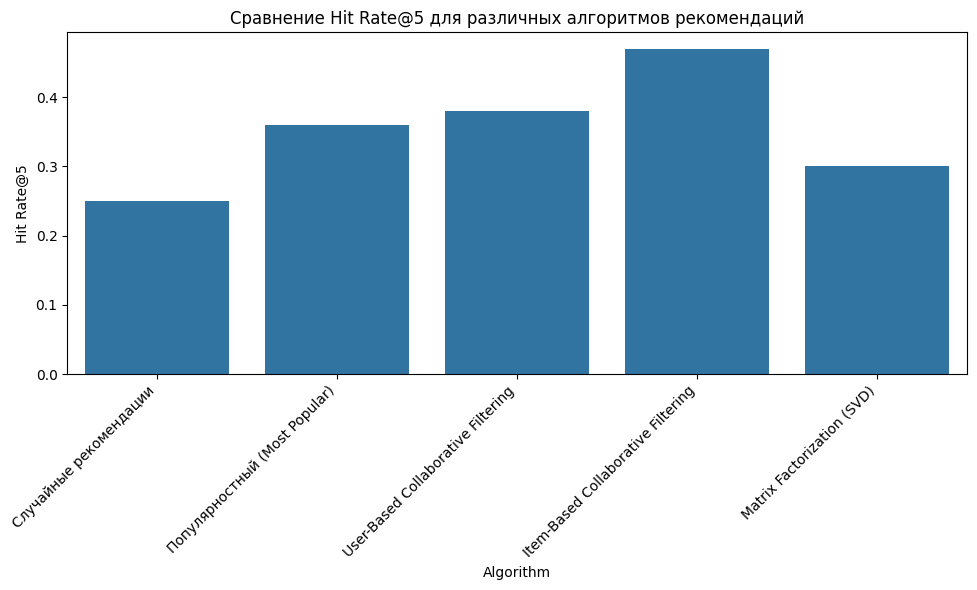

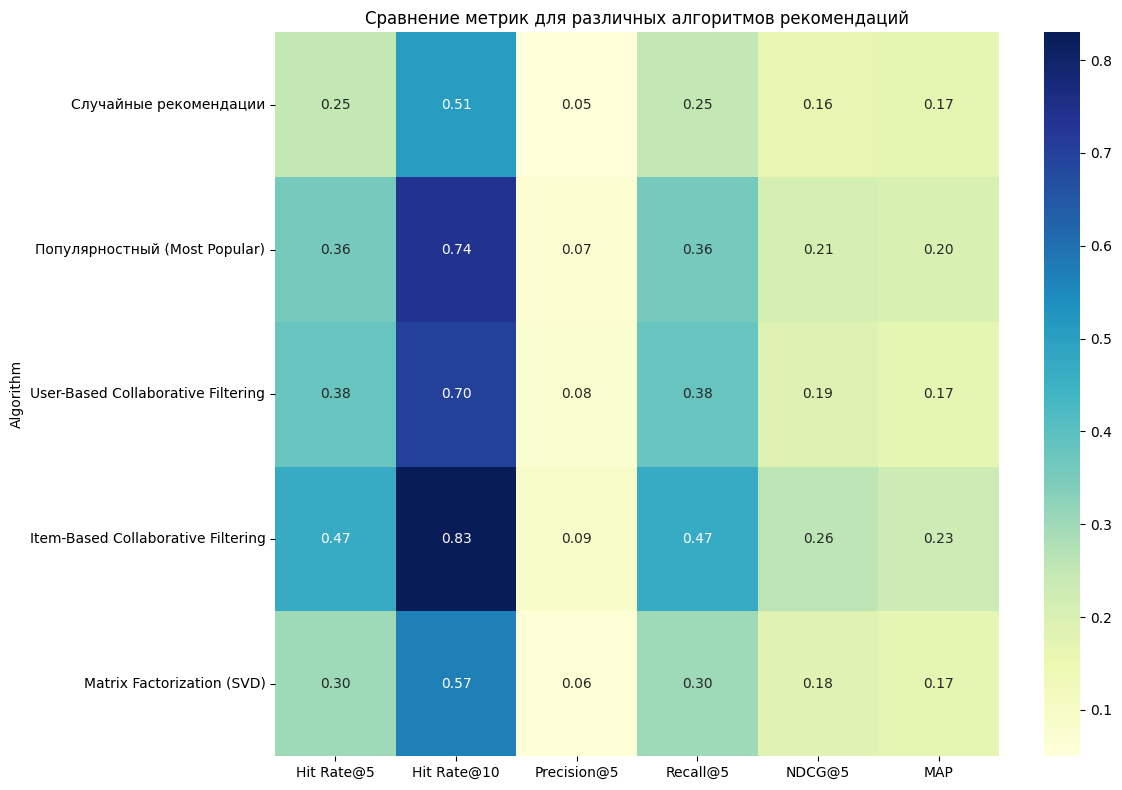

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
import random
from collections import defaultdict

# 1. Подготовка данных
# Проверим корректность переменной is_image_liked
comparisons['is_image_liked'] = (
    (~comparisons['selected_original'] & (comparisons['variable_image_filename'] != 'afro.jpg')) |
    (comparisons['selected_original'] & (comparisons['variable_image_filename'] == 'afro.jpg'))
)

# Правильное разделение данных: последнее взаимодействие каждого пользователя для тестирования
def create_train_test_split(df):
    df = df.copy()
    df = df.sort_values(['user_id', 'created_at'])

    # Выделяем последнее взаимодействие каждого пользователя с положительным результатом
    positive_users = df[df['is_image_liked'] == True]['user_id'].unique()

    test = pd.DataFrame()
    train = df.copy()

    for user in positive_users:
        user_data = df[df['user_id'] == user]
        user_positive = user_data[user_data['is_image_liked'] == True]

        if len(user_positive) > 0:
            # Выбираем последнее положительное взаимодействие
            last_positive = user_positive.iloc[-1:]

            # Добавляем в тест
            test = pd.concat([test, last_positive])

            # Удаляем из обучения
            train = train.drop(last_positive.index)

    return train, test

# 2. Разделение данных
train_data, test_data = create_train_test_split(comparisons)

print(f"Train data shape: {train_data.shape}, Test data shape: {test_data.shape}")
print(f"Number of unique users in train: {train_data['user_id'].nunique()}")
print(f"Number of unique users in test: {test_data['user_id'].nunique()}")
print(f"Number of liked interactions in test: {test_data['is_image_liked'].sum()}")

# 3. Создание матриц взаимодействий
train_interaction_matrix = pd.crosstab(
    index=train_data['user_id'],
    columns=train_data['variable_image_filename'],
    values=train_data['is_image_liked'],
    aggfunc=lambda x: 1 if any(x) else 0
).fillna(0)

# 4. Функции для вычисления метрик
def precision_at_k(recommendations, ground_truth, k=5):
    """
    Вычисляет Precision@k для рекомендаций
    """
    if not recommendations or len(recommendations) == 0:
        return 0.0

    # Ограничиваем рекомендации до top-k
    recommendations = recommendations[:k]

    # Считаем количество релевантных элементов в рекомендациях
    relevant_count = sum(1 for item in recommendations if item in ground_truth)

    return relevant_count / min(k, len(recommendations)) if len(recommendations) > 0 else 0

def recall_at_k(recommendations, ground_truth, k=5):
    """
    Вычисляет Recall@k для рекомендаций
    """
    if not recommendations or len(recommendations) == 0 or not ground_truth:
        return 0.0

    # Ограничиваем рекомендации до top-k
    recommendations = recommendations[:k]

    # Считаем количество релевантных элементов в рекомендациях
    relevant_count = sum(1 for item in recommendations if item in ground_truth)

    return relevant_count / len(ground_truth) if len(ground_truth) > 0 else 0

def ndcg_at_k(recommendations, ground_truth, k=5):
    """
    Вычисляет NDCG@k для рекомендаций
    """
    if not recommendations or len(recommendations) == 0 or not ground_truth:
        return 0.0

    # Ограничиваем рекомендации до top-k
    recommendations = recommendations[:k]

    # Инициализируем DCG и IDCG
    dcg = 0.0
    idcg = 0.0

    # Вычисляем DCG
    for i, item in enumerate(recommendations):
        if item in ground_truth:
            dcg += 1.0 / np.log2(i + 2)  # Позиция i+1, логарифм base 2 от i+2

    # Вычисляем IDCG
    for i in range(min(len(ground_truth), k)):
        idcg += 1.0 / np.log2(i + 2)

    return dcg / idcg if idcg > 0 else 0

def average_precision(recommendations, ground_truth):
    """
    Вычисляет Average Precision для рекомендаций
    """
    if not recommendations or len(recommendations) == 0 or not ground_truth:
        return 0.0

    hits = 0
    sum_precision = 0.0

    for i, item in enumerate(recommendations):
        if item in ground_truth:
            hits += 1
            sum_precision += hits / (i + 1)

    return sum_precision / len(ground_truth) if len(ground_truth) > 0 else 0

def hit_rate_at_k(recommendations, ground_truth, k=5):
    """
    Вычисляет Hit Rate@k для рекомендаций
    """
    if not recommendations or len(recommendations) == 0 or not ground_truth:
        return 0.0

    # Ограничиваем рекомендации до top-k
    recommendations = recommendations[:k]

    # Проверяем, есть ли хотя бы один релевантный элемент в рекомендациях
    hit = any(item in ground_truth for item in recommendations)

    return 1.0 if hit else 0.0

def evaluate_all_metrics(recommendations, test_set, k=5):
    """
    Вычисляет все метрики для рекомендаций
    """
    metrics = {
        f'Hit Rate@{k}': 0.0,
        f'Precision@{k}': 0.0,
        f'Recall@{k}': 0.0,
        f'NDCG@{k}': 0.0,
        'MAP': 0.0
    }

    total_users = 0

    for user_id, ground_truth in test_set.items():
        if user_id not in recommendations:
            continue

        user_recs = recommendations[user_id]

        metrics[f'Hit Rate@{k}'] += hit_rate_at_k(user_recs, ground_truth, k)
        metrics[f'Precision@{k}'] += precision_at_k(user_recs, ground_truth, k)
        metrics[f'Recall@{k}'] += recall_at_k(user_recs, ground_truth, k)
        metrics[f'NDCG@{k}'] += ndcg_at_k(user_recs, ground_truth, k)
        metrics['MAP'] += average_precision(user_recs, ground_truth)

        total_users += 1

    # Нормализуем метрики
    if total_users > 0:
        for key in metrics:
            metrics[key] /= total_users

    return metrics

# 5. Подготовка тестовых данных
# Создаем словарь {user_id: [liked_items]}
test_ground_truth = {}
for _, row in test_data.iterrows():
    user_id = row['user_id']
    if row['is_image_liked']:
        if user_id not in test_ground_truth:
            test_ground_truth[user_id] = []
        test_ground_truth[user_id].append(row['variable_image_filename'])

# 6. Реализация различных алгоритмов рекомендаций

# 6.1 Случайные рекомендации
def random_recommendations(users, items, n_recommendations=5):
    """
    Генерирует случайные рекомендации для пользователей
    """
    recommendations = {}
    all_items = list(items)

    for user in users:
        recommendations[user] = random.sample(all_items, min(n_recommendations, len(all_items)))

    return recommendations

# 6.2 Рекомендации на основе популярности
def popularity_recommendations(train_data, users, n_recommendations=5):
    """
    Генерирует рекомендации на основе популярности элементов
    """
    item_popularity = train_data[train_data['is_image_liked'] == True]['variable_image_filename'].value_counts()
    popular_items = item_popularity.index.tolist()

    recommendations = {}
    for user in users:
        recommendations[user] = popular_items[:n_recommendations]

    return recommendations

# 6.3 Item-Based Collaborative Filtering
def item_based_cf_recommendations(train_matrix, users, n_recommendations=5):
    """
    Генерирует рекомендации на основе Item-Based CF
    """
    # Вычисляем матрицу сходства между элементами
    item_interaction_matrix = train_matrix.T
    item_similarity = cosine_similarity(item_interaction_matrix)
    item_similarity_df = pd.DataFrame(
        item_similarity,
        index=item_interaction_matrix.index,
        columns=item_interaction_matrix.index
    )

    recommendations = {}
    for user in users:
        if user not in train_matrix.index:
            continue

        # Получаем элементы, с которыми пользователь взаимодействовал и их оценки
        user_items = train_matrix.loc[user]
        user_interactions = user_items[user_items > 0]

        # Если пользователь не взаимодействовал ни с чем положительно, пропускаем
        if len(user_interactions) == 0:
            continue

        # Элементы, с которыми пользователь не взаимодействовал
        non_interacted_items = user_items[user_items == 0].index.tolist()

        # Рассчитываем рекомендательные оценки
        recommendation_scores = {}

        for item in non_interacted_items:
            # Для каждого не взаимодействия считаем сходство-взвешенную оценку
            item_score = 0
            for interacted_item, interaction_score in user_interactions.items():
                if item in item_similarity_df.index and interacted_item in item_similarity_df.columns:
                    similarity = item_similarity_df.loc[item, interacted_item]
                    item_score += similarity * interaction_score

            recommendation_scores[item] = item_score

        # Преобразуем в Series и сортируем
        recommendations_series = pd.Series(recommendation_scores).sort_values(ascending=False)

        # Вернуть top-n рекомендаций
        if len(recommendations_series) > 0:
            recommendations[user] = recommendations_series.head(n_recommendations).index.tolist()

    return recommendations

# 6.4 User-Based Collaborative Filtering
def user_based_cf_recommendations(train_matrix, users, n_recommendations=5):
    """
    Генерирует рекомендации на основе User-Based CF
    """
    # Вычисляем матрицу сходства между пользователями
    user_similarity = cosine_similarity(train_matrix)
    user_similarity_df = pd.DataFrame(
        user_similarity,
        index=train_matrix.index,
        columns=train_matrix.index
    )

    recommendations = {}
    for user in users:
        if user not in train_matrix.index:
            continue

        # Находим похожих пользователей
        similar_users = user_similarity_df.loc[user].sort_values(ascending=False)[1:11]  # Топ-10 похожих пользователей

        # Предметы, с которыми пользователь уже взаимодействовал
        user_items = train_matrix.loc[user]

        # Предметы, с которыми пользователь не взаимодействовал
        non_interacted_items = user_items[user_items == 0].index.tolist()

        # Рассчитываем рекомендательные оценки
        recommendation_scores = {}

        for item in non_interacted_items:
            item_score = 0
            total_similarity = 0

            for sim_user, similarity in similar_users.items():
                if sim_user in train_matrix.index:
                    # Если похожий пользователь взаимодействовал с предметом
                    if train_matrix.loc[sim_user, item] > 0:
                        item_score += similarity * train_matrix.loc[sim_user, item]
                        total_similarity += similarity

            if total_similarity > 0:
                recommendation_scores[item] = item_score / total_similarity
            else:
                recommendation_scores[item] = 0

        # Преобразуем в Series и сортируем
        recommendations_series = pd.Series(recommendation_scores).sort_values(ascending=False)

        # Вернуть top-n рекомендаций
        if len(recommendations_series) > 0:
            recommendations[user] = recommendations_series.head(n_recommendations).index.tolist()

    return recommendations

# 6.5 Matrix Factorization (SVD) - используем scikit-learn вместо surprise
def svd_recommendations(train_matrix, users, n_recommendations=5):
    """
    Генерирует рекомендации на основе SVD (используя scikit-learn)
    """
    # Применяем SVD к матрице взаимодействий
    n_components = min(20, min(train_matrix.shape) - 1)  # Убедимся, что компонент меньше размерности матрицы
    svd = TruncatedSVD(n_components=n_components, random_state=42)

    # Преобразуем матрицу в массив numpy
    matrix_array = train_matrix.values

    # Применяем SVD
    user_features = svd.fit_transform(matrix_array)
    item_features = svd.components_.T

    # Реконструируем матрицу
    reconstructed_matrix = np.dot(user_features, svd.components_)
    reconstructed_df = pd.DataFrame(
        reconstructed_matrix,
        index=train_matrix.index,
        columns=train_matrix.columns
    )

    recommendations = {}
    for user in users:
        if user not in train_matrix.index:
            continue

        # Получаем предсказанные оценки для всех элементов
        user_predictions = reconstructed_df.loc[user]

        # Убираем элементы, с которыми пользователь уже взаимодействовал
        user_interactions = train_matrix.loc[user]
        already_interacted = user_interactions[user_interactions > 0].index
        user_predictions = user_predictions.drop(already_interacted)

        # Сортируем предсказания
        top_recommendations = user_predictions.sort_values(ascending=False).head(n_recommendations).index.tolist()

        if top_recommendations:
            recommendations[user] = top_recommendations

    return recommendations

# 6.6 Гибридный подход (CF + Content Features)
def hybrid_recommendations(train_data, users, items_df, n_recommendations=5):
    """
    Генерирует рекомендации на основе гибридного подхода, сочетающего CF и контентные особенности
    """
    # Item-Based CF компонент
    train_matrix = pd.crosstab(
        index=train_data['user_id'],
        columns=train_data['variable_image_filename'],
        values=train_data['is_image_liked'],
        aggfunc=lambda x: 1 if any(x) else 0
    ).fillna(0)

    item_interaction_matrix = train_matrix.T
    item_cf_similarity = cosine_similarity(item_interaction_matrix)
    item_cf_similarity_df = pd.DataFrame(
        item_cf_similarity,
        index=item_interaction_matrix.index,
        columns=item_interaction_matrix.index
    )

    # Компонент на основе контентных особенностей
    # Определяем категории изображений на основе имени файла
    categories = {}
    for file in items_df['filename']:
        if 'fs_' in file:
            categories[file] = 'face_style'
        elif 'hair' in file:
            categories[file] = 'hair'
        elif any(celebrity in file for celebrity in ['beyonce', 'taylor_swift', 'depp', 'trump']):
            categories[file] = 'celebrity'
        else:
            categories[file] = 'other'

    # Создаем матрицу one-hot encoding для категорий
    category_matrix = pd.get_dummies(pd.Series(categories))

    # Вычисляем контентное сходство на основе категорий
    content_similarity = cosine_similarity(category_matrix)
    content_similarity_df = pd.DataFrame(
        content_similarity,
        index=category_matrix.index,
        columns=category_matrix.index
    )

    # Гибридная матрица сходства (комбинация CF и контентной)
    hybrid_similarity = {}
    for item1 in item_interaction_matrix.index:
        hybrid_similarity[item1] = {}
        for item2 in item_interaction_matrix.index:
            cf_sim = 0
            if item1 in item_cf_similarity_df.index and item2 in item_cf_similarity_df.columns:
                cf_sim = item_cf_similarity_df.loc[item1, item2]

            content_sim = 0
            if item1 in content_similarity_df.index and item2 in content_similarity_df.columns:
                content_sim = content_similarity_df.loc[item1, item2]

            # Комбинируем с весами: 70% CF similarity + 30% content similarity
            hybrid_similarity[item1][item2] = 0.7 * cf_sim + 0.3 * content_sim

    recommendations = {}
    for user in users:
        if user not in train_matrix.index:
            continue

        # Получаем элементы, с которыми пользователь взаимодействовал и их оценки
        user_items = train_matrix.loc[user]
        user_interactions = user_items[user_items > 0]

        # Если пользователь не взаимодействовал ни с чем положительно, пропускаем
        if len(user_interactions) == 0:
            continue

        # Элементы, с которыми пользователь не взаимодействовал
        non_interacted_items = user_items[user_items == 0].index.tolist()

        # Рассчитываем рекомендательные оценки
        recommendation_scores = {}

        for item in non_interacted_items:
            # Для каждого не взаимодействия считаем сходство-взвешенную оценку
            item_score = 0
            for interacted_item, interaction_score in user_interactions.items():
                if item in hybrid_similarity and interacted_item in hybrid_similarity[item]:
                    similarity = hybrid_similarity[item][interacted_item]
                    item_score += similarity * interaction_score

            recommendation_scores[item] = item_score

        # Преобразуем в Series и сортируем
        recommendations_series = pd.Series(recommendation_scores).sort_values(ascending=False)

        # Вернуть top-n рекомендаций
        if len(recommendations_series) > 0:
            recommendations[user] = recommendations_series.head(n_recommendations).index.tolist()

    return recommendations

# 7. Запуск всех алгоритмов и вычисление метрик

# Получаем список пользователей и всех элементов
all_users = test_ground_truth.keys()
all_items = train_data['variable_image_filename'].unique()

# 7.1 Генерация рекомендаций
print("Generating recommendations...")

# Случайные рекомендации
random_recs = random_recommendations(all_users, all_items, n_recommendations=10)

# Рекомендации на основе популярности
popularity_recs = popularity_recommendations(train_data, all_users, n_recommendations=10)

# Item-Based CF
item_based_recs = item_based_cf_recommendations(train_interaction_matrix, all_users, n_recommendations=10)

# User-Based CF
user_based_recs = user_based_cf_recommendations(train_interaction_matrix, all_users, n_recommendations=10)

# SVD (scikit-learn)
svd_recs = svd_recommendations(train_interaction_matrix, all_users, n_recommendations=10)


# 7.2 Вычисление метрик
print("Computing metrics...")

# Вычисляем метрики для k=5
k = 5
random_metrics_5 = evaluate_all_metrics(random_recs, test_ground_truth, k=k)
popularity_metrics_5 = evaluate_all_metrics(popularity_recs, test_ground_truth, k=k)
item_based_metrics_5 = evaluate_all_metrics(item_based_recs, test_ground_truth, k=k)
user_based_metrics_5 = evaluate_all_metrics(user_based_recs, test_ground_truth, k=k)
svd_metrics_5 = evaluate_all_metrics(svd_recs, test_ground_truth, k=k)

# Вычисляем метрики для k=10
k = 10
random_metrics_10 = evaluate_all_metrics(random_recs, test_ground_truth, k=k)
popularity_metrics_10 = evaluate_all_metrics(popularity_recs, test_ground_truth, k=k)
item_based_metrics_10 = evaluate_all_metrics(item_based_recs, test_ground_truth, k=k)
user_based_metrics_10 = evaluate_all_metrics(user_based_recs, test_ground_truth, k=k)
svd_metrics_10 = evaluate_all_metrics(svd_recs, test_ground_truth, k=k)

# 7.3 Создаем итоговую таблицу
results = pd.DataFrame({
    'Algorithm': [
        'Случайные рекомендации',
        'Популярностный (Most Popular)',
        'User-Based Collaborative Filtering',
        'Item-Based Collaborative Filtering',
        'Matrix Factorization (SVD)'
    ],
    'Hit Rate@5': [
        random_metrics_5['Hit Rate@5'],
        popularity_metrics_5['Hit Rate@5'],
        user_based_metrics_5['Hit Rate@5'],
        item_based_metrics_5['Hit Rate@5'],
        svd_metrics_5['Hit Rate@5']
    ],
    'Hit Rate@10': [
        random_metrics_10['Hit Rate@10'],
        popularity_metrics_10['Hit Rate@10'],
        user_based_metrics_10['Hit Rate@10'],
        item_based_metrics_10['Hit Rate@10'],
        svd_metrics_10['Hit Rate@10']
    ],
    'Precision@5': [
        random_metrics_5['Precision@5'],
        popularity_metrics_5['Precision@5'],
        user_based_metrics_5['Precision@5'],
        item_based_metrics_5['Precision@5'],
        svd_metrics_5['Precision@5']
    ],
    'Recall@5': [
        random_metrics_5['Recall@5'],
        popularity_metrics_5['Recall@5'],
        user_based_metrics_5['Recall@5'],
        item_based_metrics_5['Recall@5'],
        svd_metrics_5['Recall@5']
    ],
    'NDCG@5': [
        random_metrics_5['NDCG@5'],
        popularity_metrics_5['NDCG@5'],
        user_based_metrics_5['NDCG@5'],
        item_based_metrics_5['NDCG@5'],
        svd_metrics_5['NDCG@5']
    ],
    'MAP': [
        random_metrics_5['MAP'],
        popularity_metrics_5['MAP'],
        user_based_metrics_5['MAP'],
        item_based_metrics_5['MAP'],
        svd_metrics_5['MAP']
    ]
})

# Форматируем числа для лучшей читаемости
for col in results.columns:
    if col != 'Algorithm':
        results[col] = results[col].map(lambda x: f"{x:.2f}")

# Выводим таблицу
print("\nСравнение рекомендательных алгоритмов и их метрик:")
print(results.to_string(index=False))

# Сохраняем результаты в CSV
results.to_csv('recommender_algorithms_comparison.csv', index=False)

# 8. Бонус: Визуализация результатов
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Преобразуем строковые значения обратно в числа для визуализации
    for col in results.columns:
        if col != 'Algorithm':
            results[col] = results[col].astype(float)

    # Создаем график для Hit Rate@5
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Algorithm', y='Hit Rate@5', data=results)
    plt.xticks(rotation=45, ha='right')
    plt.title('Сравнение Hit Rate@5 для различных алгоритмов рекомендаций')
    plt.tight_layout()
    plt.savefig('hit_rate_comparison.png')

    # Создаем тепловую карту для всех метрик
    metrics_cols = [col for col in results.columns if col != 'Algorithm']
    plt.figure(figsize=(12, 8))
    heatmap_data = results.set_index('Algorithm')[metrics_cols]
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Сравнение метрик для различных алгоритмов рекомендаций')
    plt.tight_layout()
    plt.savefig('metrics_comparison_heatmap.png')

    print("Visualization saved to working directory.")
except:
    print("Visualization skipped due to missing dependencies.")

<ipython-input-38-fd835c073377>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




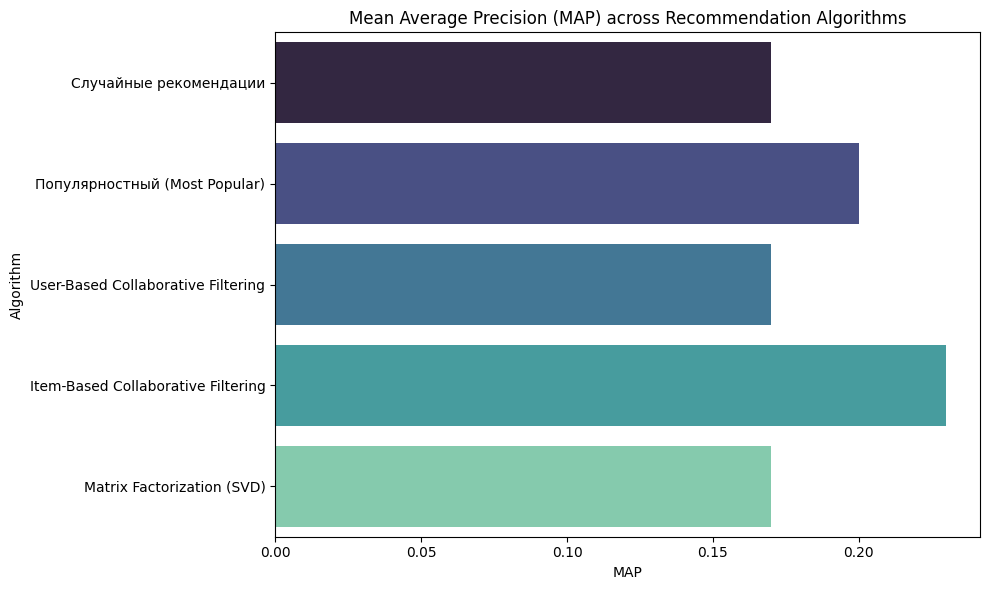

In [38]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# График с помощью Plotly Express — интерактивное сравнение по Hit Rate@5
fig_hit_rate5 = px.bar(
    results,
    x='Algorithm',
    y='Hit Rate@5',
    title='Hit Rate@5 across Recommendation Algorithms',
    labels={'Hit Rate@5': 'Hit Rate@5'},
    text_auto='.2f'
)

# График с помощью Plotly Express — интерактивное сравнение по Precision@5
fig_precision5 = px.bar(
    results,
    x='Algorithm',
    y='Precision@5',
    title='Precision@5 across Recommendation Algorithms',
    labels={'Precision@5': 'Precision@5'},
    text_auto='.2f'
)

# График с помощью Plotly Express — интерактивное сравнение по NDCG@5
fig_ndcg5 = px.bar(
    results,
    x='Algorithm',
    y='NDCG@5',
    title='NDCG@5 across Recommendation Algorithms',
    labels={'NDCG@5': 'NDCG@5'},
    text_auto='.2f'
)

# График с помощью seaborn — MAP по алгоритмам
plt.figure(figsize=(10, 6))
sns.barplot(x='MAP', y='Algorithm', data=results, palette='mako')
plt.title('Mean Average Precision (MAP) across Recommendation Algorithms')
plt.xlabel('MAP')
plt.ylabel('Algorithm')
plt.tight_layout()

fig_hit_rate5.show()
fig_precision5.show()
fig_ndcg5.show()
